In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split  # For Spilitting our data set into train and test in 70-30 ratio


from sklearn.preprocessing import MinMaxScaler # For data rescaling

import statsmodels.api as sm # For bulilding model

from statsmodels.stats.outliers_influence import variance_inflation_factor # For calculating VIF

# importing for RFE feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score # for Calcluting system's R2 square score.


import warnings
warnings.filterwarnings('ignore') # For ignoring warnings

### Reading and storing data in dataframe 'bike'

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

### Checking if any null values are there

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing Columns that are of no use

Based on the data dictionary, the following variables can be removed from further analysis:

instant : As this is an Index variable

dteday : Month and Year columns are enough for analysis date can be removed.

casual & registered : Both these are not needed are final prediction is on cnt variable which is a sum of causal & registered.*

In [6]:
# Creating new data frame 'bike_df' which does not have above redundant columns
bike_df=bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Categorical Variable

From our analysis we have figured out following are categorical vairable in out data

'mnth', 'weekday', 'season' & 'weathersit'.

We will change these to categorical nature and create therir dummy variable 

In [8]:
# Convert to 'category' data type

bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')

In [9]:
bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [10]:
bike_df.shape

(730, 30)

### Splitting data into Train and Test data set

In [11]:
df_train,df_test = train_test_split(bike_df, train_size = 0.7, random_state=100)

In [12]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Visualizing Train data set

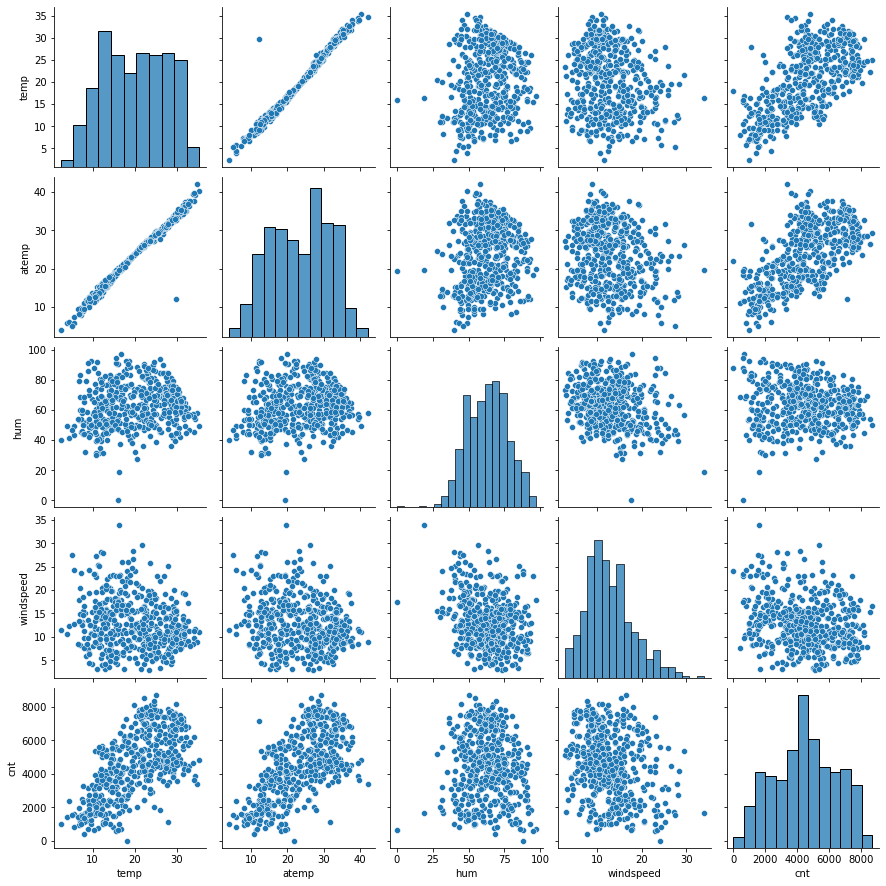

In [13]:
# visualizing numerical Variable
sns.pairplot(df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

From Above plot, we can that there is some linear relationship b\w variables such as team, atemp and cnt.

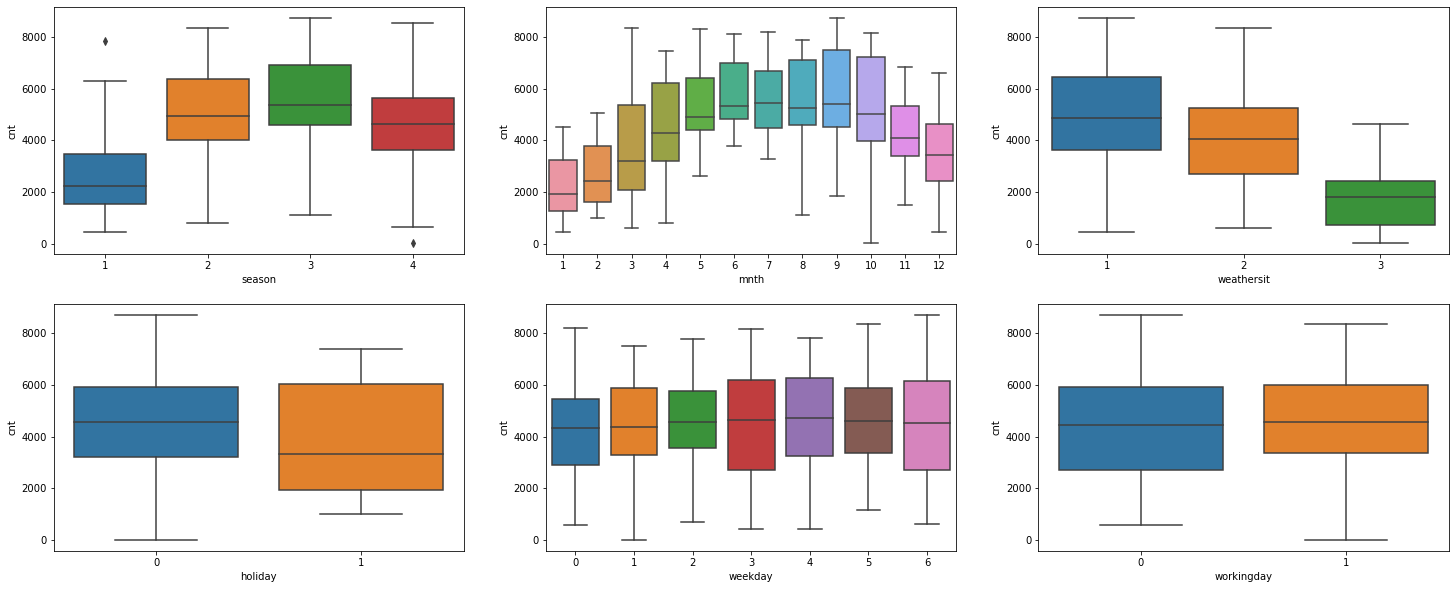

In [14]:
#Visualizing categorical variable with the help of box plot

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

* Maximum booking are made in season 3 for two years.
* mnth data shows that from 1 month booking increases upto mid year and then again decreases.
* Weathersit has the maximum number of bookings.
* Unlike what we would think, bookins are more on non holiday.
* Weekdays does not influenece much on predictor variable.
* More bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years).

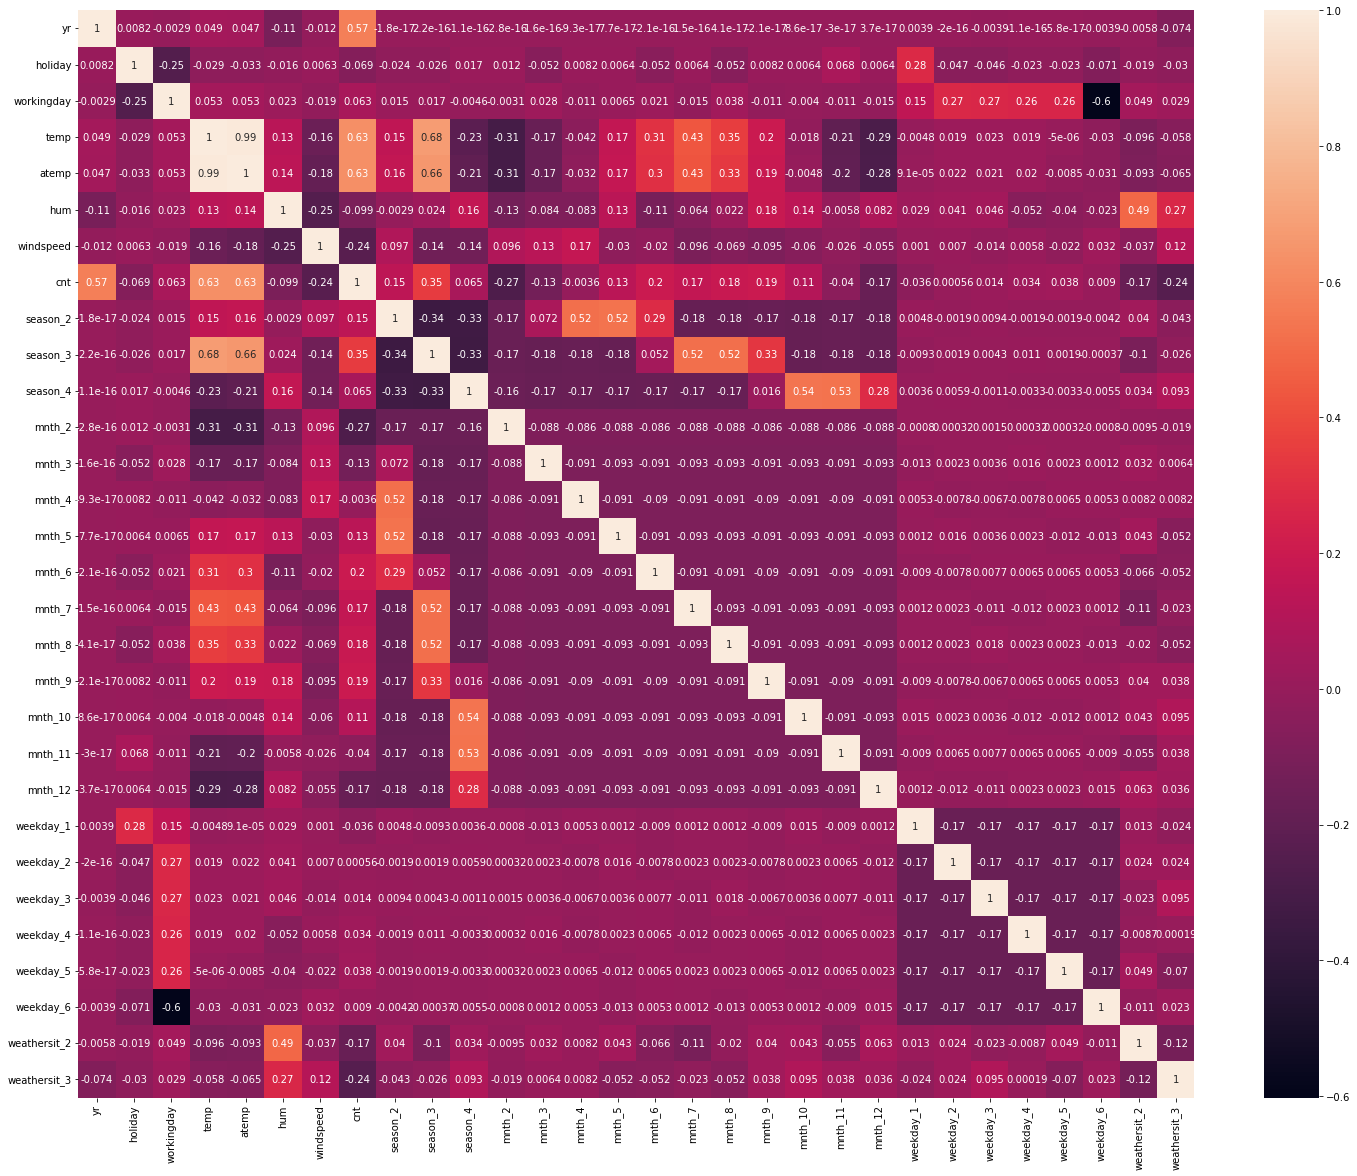

In [15]:
# Co-relation 
plt.figure(figsize=(25,20))
sns.heatmap(bike_df.corr(), annot = True)
plt.show()

There are high co-relation variable (temp, atemp, e.t.c) indication multicolinearity.

### Rescaling data

In [16]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


Variables to be rescaled are - 'temp','hum','windspeed','atemp','cnt'

In [17]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


# Building Linear regression model

In [18]:
# Creating sets of dependent (X) and independent (y) variable.

y_train = df_train.pop('cnt')
X_train = df_train

### Applying RFE to select features


In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) #RFE to select 15 Variable out of total 30 i.e taking half of the features into consideration
rfe = rfe.fit(X_train, y_train)

In [20]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [21]:
col = X_train.columns[rfe.support_] # Variables selected
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [22]:
X_train.columns[~rfe.support_] # variables not selected

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [23]:
# X_train_rfe is the data set containing selected features
X_train_rfe = X_train[col]

## Now Applying stats model on selected features

### Model 1

In [24]:
# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Check the parameters obtained
lr_model.params

const           0.195221
yr              0.230148
holiday        -0.054466
workingday      0.044468
temp            0.497208
hum            -0.163900
windspeed      -0.182540
season_2        0.118324
season_3        0.029169
season_4        0.143004
mnth_8          0.047286
mnth_9          0.117613
mnth_10         0.041624
weekday_6       0.053083
weathersit_2   -0.057693
weathersit_3   -0.250689
dtype: float64

In [25]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          5.17e-191
Time:                        11:40:44   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790      0.000       0.139       0.252
yr               0.2301      0.008     28.743      0.000       0.214       0.246
holiday         -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday       0.0445      0.012      3.856      0.000       0.022       0.067
temp             0.4972      0.034     14.821      0.000       0.431       0.563
hum             -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed       -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_2         0.1183      0.015      8.038      0.000       0.089       0.147
season_3         0.0292      0.022      1.329      0.184      -0.014       0.072
season_4         0.1430      0.013     10.671      0.000       0.117       0.169
mnth_8           0.0473      0.017      2.732      0.007       0.013       0.081
mnth_9           0.1176      0.017      6.876      0.000       0.084       0.151
mnth_10          0.0416      0.017      2.391      0.017       0.007       0.076
weekday_6        0.0531      0.015      3.655      0.000       0.025       0.082
weathersit_2    -0.0577      0.010     -5.564      0.000      -0.078      -0.037
weathersit_3    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF for Model 1

In [26]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


season_3 has High P value and high VIF

### Model 2 (Removing season_3)

In [27]:
X2 = X_train_rfe.drop(["season_3"], axis = 1)

In [28]:
# Add a constant
X_train_sm = sm.add_constant(X2)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Check the parameters obtained
lr_model.params

const           0.194758
yr              0.229241
holiday        -0.055677
workingday      0.044188
temp            0.530905
hum            -0.170764
windspeed      -0.185795
season_2        0.104917
season_4        0.134863
mnth_8          0.055722
mnth_9          0.125195
mnth_10         0.038505
weekday_6       0.052702
weathersit_2   -0.056753
weathersit_3   -0.246985
dtype: float64

In [29]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.70e-192
Time:                        11:40:44   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769      0.000       0.138       0.251
yr               0.2292      0.008     28.712      0.000       0.214       0.245
holiday         -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday       0.0442      0.012      3.829      0.000       0.022       0.067
temp             0.5309      0.022     24.146      0.000       0.488       0.574
hum             -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed       -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_2         0.1049      0.011      9.778      0.000       0.084       0.126
season_4         0.1349      0.012     11.306      0.000       0.111       0.158
mnth_8           0.0557      0.016      3.457      0.001       0.024       0.087
mnth_9           0.1252      0.016      7.757      0.000       0.093       0.157
mnth_10          0.0385      0.017      2.230      0.026       0.005       0.072
weekday_6        0.0527      0.015      3.627      0.000       0.024       0.081
weathersit_2    -0.0568      0.010     -5.482      0.000      -0.077      -0.036
weathersit_3    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF for Model 2

In [30]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


'hum' has high VIF

### Model 3 (Removing hum)

In [31]:
X3 = X2.drop(["hum"], axis = 1)

In [32]:
# Add a constant
X_train_sm = sm.add_constant(X3)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Check the parameters obtained
lr_model.params

const           0.093743
yr              0.233082
holiday        -0.054099
workingday      0.047315
temp            0.510620
windspeed      -0.152990
season_2        0.101899
season_4        0.126666
mnth_8          0.053932
mnth_9          0.118514
mnth_10         0.034306
weekday_6       0.057825
weathersit_2   -0.083999
weathersit_3   -0.292947
dtype: float64

In [33]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.97e-188
Time:                        11:40:44   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914      0.000       0.056       0.131
yr               0.2331      0.008     28.769      0.000       0.217       0.249
holiday         -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday       0.0473      0.012      4.026      0.000       0.024       0.070
temp             0.5106      0.022     23.229      0.000       0.467       0.554
windspeed       -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_2         0.1019      0.011      9.325      0.000       0.080       0.123
season_4         0.1267      0.012     10.524      0.000       0.103       0.150
mnth_8           0.0539      0.016      3.281      0.001       0.022       0.086
mnth_9           0.1185      0.016      7.226      0.000       0.086       0.151
mnth_10          0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_6        0.0578      0.015      3.912      0.000       0.029       0.087
weathersit_2    -0.0840      0.009     -9.676      0.000      -0.101      -0.067
weathersit_3    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF for Model 3

In [34]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


mnth_10 has high P-value and low VIF

### Model 4 (Removing mnth_10)

In [35]:
X4 = X3.drop(["mnth_10"], axis = 1)

In [36]:
# Add a constant
X_train_sm = sm.add_constant(X4)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Check the parameters obtained
lr_model.params

const           0.090297
yr              0.232711
holiday        -0.056011
workingday      0.046317
temp            0.518828
windspeed      -0.150835
season_2        0.100362
season_4        0.138202
mnth_8          0.050952
mnth_9          0.113626
weekday_6       0.056927
weathersit_2   -0.083049
weathersit_3   -0.287225
dtype: float64

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.64e-189
Time:                        11:40:44   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740      0.000       0.053       0.128
yr               0.2327      0.008     28.651      0.000       0.217       0.249
holiday         -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday       0.0463      0.012      3.933      0.000       0.023       0.069
temp             0.5188      0.022     23.980      0.000       0.476       0.561
windspeed       -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_2         0.1004      0.011      9.183      0.000       0.079       0.122
season_4         0.1382      0.011     13.148      0.000       0.118       0.159
mnth_8           0.0510      0.016      3.104      0.002       0.019       0.083
mnth_9           0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6        0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_2    -0.0830      0.009     -9.555      0.000      -0.100      -0.066
weathersit_3    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF for Model 4

In [38]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


holiday has high P value

### Model 5 (Removing holiday)

In [39]:
X5 = X4.drop(["holiday"], axis = 1)

In [40]:
# Add a constant
X_train_sm = sm.add_constant(X5)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# Check the parameters obtained
lr_model.params

const           0.080941
yr              0.232844
workingday      0.054605
temp            0.520838
windspeed      -0.151781
season_2        0.101039
season_4        0.137942
mnth_8          0.051225
mnth_9          0.111729
weekday_6       0.065324
weathersit_2   -0.082579
weathersit_3   -0.285973
dtype: float64

In [41]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.31e-189
Time:                        11:40:44   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0809      0.019      4.365      0.000       0.045       0.117
yr               0.2328      0.008     28.578      0.000       0.217       0.249
workingday       0.0546      0.011      4.926      0.000       0.033       0.076
temp             0.5208      0.022     24.022      0.000       0.478       0.563
windspeed       -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_2         0.1010      0.011      9.220      0.000       0.080       0.123
season_4         0.1379      0.011     13.083      0.000       0.117       0.159
mnth_8           0.0512      0.016      3.111      0.002       0.019       0.084
mnth_9           0.1117      0.016      6.864      0.000       0.080       0.144
weekday_6        0.0653      0.014      4.576      0.000       0.037       0.093
weathersit_2    -0.0826      0.009     -9.474      0.000      -0.100      -0.065
weathersit_3    -0.2860      0.025    -11.664      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF for Model 5

In [42]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_2,1.82
8,weekday_6,1.69
6,mnth_8,1.58
9,weathersit_2,1.54
5,season_4,1.51
7,mnth_9,1.30


### Note - We have not removed 'temp' variable as during visualization we have seen that there is a strong linear relation between 'cnt' and 'temp' ,  removing temp will drop R-squared significantly.

### As P-values and VIF are now all low, we will take this as our final model with R-squared = 0.838 which means almost 84% variance in dependent variable is explained by our final model.

# Residual Analysis

In [43]:
y_train_pred = lr_model.predict(X_train_sm)

In [44]:
res= y_train-y_train_pred

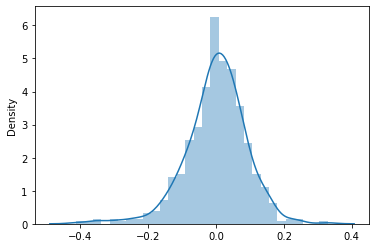

In [45]:
sns.distplot(res)
plt.show()

### As Residuals are normally distributed and the mean is centered around zero so we can say that are linear regression is valid

# Prediction

In [46]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# Rescaling data in test set with just transform as we need not to apply fit on test data

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
# Creating dependent (y) and independent variable set from test data

y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
# Removing Variables not in our model
X_test_sm = X_test[['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3']]

In [51]:
# add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [52]:
# final independent variable test data set

X_test_sm.head()

,const,yr,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1,0
221,1.0,0,1,0.881625,0.339570,0,0,1,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0,0


In [53]:
# getting Predicted value for dependent variable in test set using model created 

y_test_pred = lr_model.predict(X_test_sm)

In [54]:
y_test_pred.head()

184    0.418804
535    0.915556
299    0.406834
221    0.594415
152    0.580668
dtype: float64

# Evaluation of model

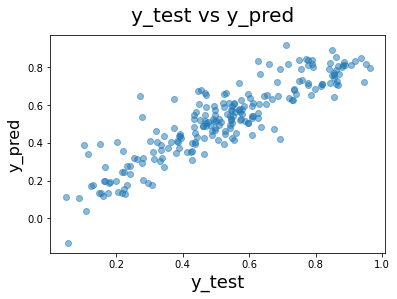

In [56]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

Predicted And Data set value reflects a strong linear dependancy, suggesting that the Model is a good fit.

In [57]:
# calculating sklearn R2 square for evaluation

r2_score(y_true = y_test, y_pred =y_test_pred )

0.797331498623773

### Final insight

Our Model R2 squared is 0.83 and 
evaluation Model R2 squared is 0.79

As both these R2 squared are comparable so the Model can be accepted